In [1]:
import pandas as pd

modis_2017= pd.read_csv("modis_2017_Australia.csv")
modis_2018= pd.read_csv("modis_2018_Australia.csv")
modis_2019= pd.read_csv("modis_2019_Australia.csv")
modis_2020= pd.read_csv("modis_2020_Australia.csv")

# Convert 'acq_date' column to datetime format
modis_2017['acq_date'] = pd.to_datetime(modis_2017['acq_date'])
modis_2018['acq_date'] = pd.to_datetime(modis_2018['acq_date'])
modis_2019['acq_date'] = pd.to_datetime(modis_2019['acq_date'])
modis_2020['acq_date'] = pd.to_datetime(modis_2020['acq_date'])

In [2]:
modis_2017.head(10)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-23.9083,147.2966,320.1,1.7,1.3,2017-01-01,47,Terra,MODIS,53,6.2,296.6,17.6,D,0
1,-23.6890,150.0994,314.3,2.7,1.6,2017-01-01,47,Terra,MODIS,22,6.2,289.3,30.0,D,0
2,-23.5908,150.1676,315.8,2.7,1.6,2017-01-01,47,Terra,MODIS,33,6.2,291.7,35.4,D,0
3,-22.4119,148.8484,316.7,2.1,1.4,2017-01-01,47,Terra,MODIS,26,6.2,295.3,25.8,D,0
4,-20.5897,147.6421,320.7,1.6,1.3,2017-01-01,47,Terra,MODIS,34,6.2,299.6,19.0,D,0
5,-21.1320,148.1897,320.5,1.8,1.3,2017-01-01,47,Terra,MODIS,36,6.2,299.7,22.9,D,0
6,-25.0719,149.7465,314.6,2.6,1.6,2017-01-01,48,Terra,MODIS,51,6.2,294.5,28.6,D,0
7,-25.6056,148.9252,320.3,2.3,1.5,2017-01-01,48,Terra,MODIS,28,6.2,300.2,25.7,D,0
8,-25.6141,148.9173,324.0,2.3,1.5,2017-01-01,48,Terra,MODIS,65,6.2,300.0,40.4,D,0
9,-28.6287,149.7381,327.8,2.9,1.6,2017-01-01,49,Terra,MODIS,40,6.2,304.0,34.9,D,0


In [3]:
# Filter Wildfires for Victoria state only and where type is 0
df_victoria_2017 = modis_2017[(modis_2017['latitude'] >= -39.0) &
                            (modis_2017['latitude'] <= -33.5) &
                            (modis_2017['longitude'] >= 140.0) &
                            (modis_2017['longitude'] <= 150.0) &
                            (modis_2017['type'] == 0)]

df_victoria_2018 = modis_2018[(modis_2018['latitude'] >= -39.0) &
                            (modis_2018['latitude'] <= -33.5) &
                            (modis_2018['longitude'] >= 140.0) &
                            (modis_2018['longitude'] <= 150.0) &
                            (modis_2018['type'] == 0)]

df_victoria_2019 = modis_2019[(modis_2019['latitude'] >= -39.0) &
                            (modis_2019['latitude'] <= -33.5) &
                            (modis_2019['longitude'] >= 140.0) &
                            (modis_2019['longitude'] <= 150.0) &
                            (modis_2019['type'] == 0)]

df_victoria_2020 = modis_2020[(modis_2020['latitude'] >= -39.0) &
                            (modis_2020['latitude'] <= -33.5) &
                            (modis_2020['longitude'] >= 140.0) &
                            (modis_2020['longitude'] <= 150.0) &
                            (modis_2020['type'] == 0)]

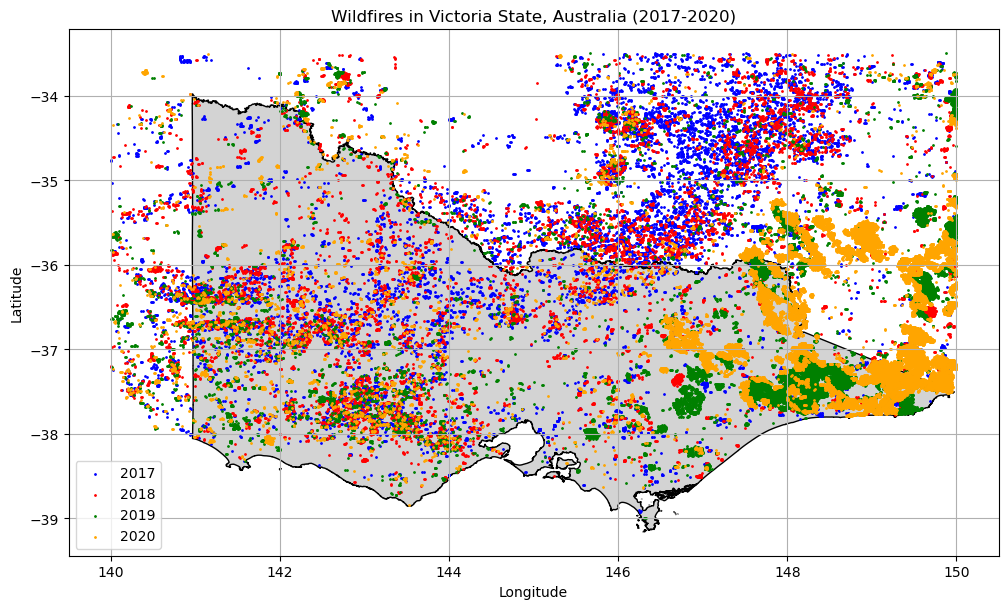

In [6]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Load shapefile for Victoria state
victoria_shapefile = gpd.read_file("australia_States_and_Territories_level_1.shp")

# Create GeoDataFrame from bushfire data
geometry_2017 = [Point(xy) for xy in zip(df_victoria_2017['longitude'], df_victoria_2017['latitude'])]
geometry_2018 = [Point(xy) for xy in zip(df_victoria_2018['longitude'], df_victoria_2018['latitude'])]
geometry_2019 = [Point(xy) for xy in zip(df_victoria_2019['longitude'], df_victoria_2019['latitude'])]
geometry_2020 = [Point(xy) for xy in zip(df_victoria_2020['longitude'], df_victoria_2020['latitude'])]

gdf_2017 = gpd.GeoDataFrame(df_victoria_2017, geometry=geometry_2017)
gdf_2018 = gpd.GeoDataFrame(df_victoria_2018, geometry=geometry_2018)
gdf_2019 = gpd.GeoDataFrame(df_victoria_2019, geometry=geometry_2019)
gdf_2020 = gpd.GeoDataFrame(df_victoria_2020, geometry=geometry_2020)

# Plot bushfires on the map of Victoria state
fig, ax = plt.subplots(figsize=(12, 12))
victoria_shapefile.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf_2017.plot(ax=ax, color='blue', markersize=1, label='2017')
gdf_2018.plot(ax=ax, color='red', markersize=1, label='2018')
gdf_2019.plot(ax=ax, color='green', markersize=1, label='2019')
gdf_2020.plot(ax=ax, color='orange', markersize=1, label='2020')

plt.title('Wildfires in Victoria State, Australia (2017-2020)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

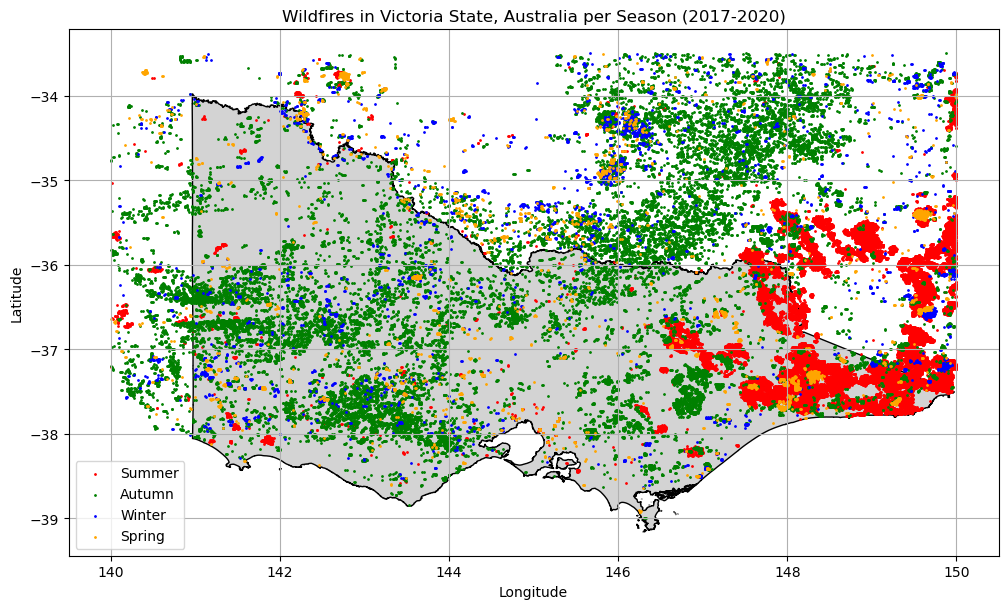

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Assuming df_victoria_2017, df_victoria_2018, df_victoria_2019, df_victoria_2020 are already loaded

# Combine all years into a single DataFrame
all_years_df = pd.concat([df_victoria_2017, df_victoria_2018, df_victoria_2019, df_victoria_2020])

# Convert acquisition date to seasons
all_years_df['month'] = pd.to_datetime(all_years_df['acq_date']).dt.month
all_years_df['season'] = all_years_df['month'].map(
    {12: 'Summer', 1: 'Summer', 2: 'Summer',
     3: 'Autumn', 4: 'Autumn', 5: 'Autumn',
     6: 'Winter', 7: 'Winter', 8: 'Winter',
     9: 'Spring', 10: 'Spring', 11: 'Spring'}
)

# Load shapefile for Victoria state
victoria_shapefile = gpd.read_file("australia_States_and_Territories_level_1.shp")

# Create GeoDataFrame from combined bushfire data
geometry = [Point(xy) for xy in zip(all_years_df['longitude'], all_years_df['latitude'])]
gdf = gpd.GeoDataFrame(all_years_df, geometry=geometry)

# Group bushfires by season
fig, ax = plt.subplots(figsize=(12, 12))
victoria_shapefile.plot(ax=ax, color='lightgrey', edgecolor='black')

for season, color in zip(['Summer', 'Autumn', 'Winter', 'Spring'], ['red', 'green', 'blue', 'orange']):
    season_data = gdf[gdf['season'] == season]
    season_data.plot(ax=ax, color=color, markersize=1, label=season)

plt.title('Wildfires in Victoria State, Australia per Season (2017-2020)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


December to February (summer), cools down March to May (autumn), chills out June to August (winter), and warms up again September to November (spring)

In [ ]:
Zone 1 = Lat -34 between -35 and Long 140 between 142
Zone 2 = Lat -35 between  -36 and Long 140  between  142
Zone 3 = Lat -36 between -37 and Long 140  between  142
Zone 4 = Lat -37 between  -38 and Long 140  between  142
Zone 5 = Lat -38 between -39 and Long 140  between  142

Zone 6 = Lat -34  between  -35 and Long 142  between  144
Zone 7 = Lat -35 between  -36 and Long 142  between  144
Zone 8 = Lat -36 between  -37 and Long 142  between  144
Zone 9 = Lat -37 between  -38 and Long 142  between  144
Zone 10 = Lat -38 between  -39 and Long 142 between  144

Zone 11 = Lat -35 between  -36 and Long 144  between  146
Zone 12 = Lat -36 between  -37 and Long 144  between  146
Zone 13 = Lat -37 between  -38 and Long 144  between  146
Zone 14 = Lat -38 between  -39 and Long 144  between  146

Zone 15 = Lat -35 between  -36 and Long 146  between  148
Zone 16 = Lat -36 between  -37 and Long 146  between  148
Zone 17 = Lat -37 between  -38 and Long 146  between  148
Zone 18 = Lat -38 between  - 39 and Long 146 between  148

Zone 19 = Lat -36 between  -37 and Long 148  between  150
Zone 20 = Lat -37 between  -38 and Long 148  between  150

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Group by acquisition date and count the number of fires each day for each dataset
fires_by_date_2017 = df_victoria_2017.groupby('acq_date').size()
fires_by_date_2018 = df_victoria_2018.groupby('acq_date').size()
fires_by_date_2019 = df_victoria_2019.groupby('acq_date').size()
fires_by_date_2020 = df_victoria_2020.groupby('acq_date').size()


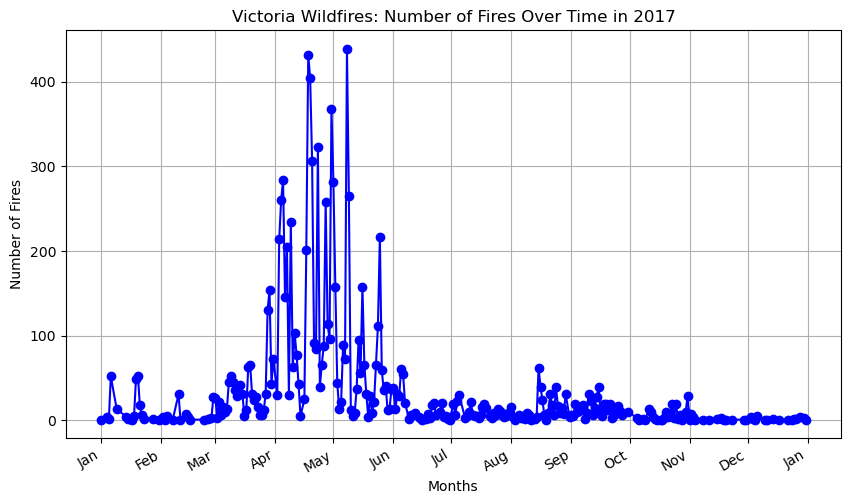

In [9]:
# Create a new figure and axis for 2017
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the data for 2017
fires_by_date_2018.plot(ax=ax1, kind='line', marker='o', color='blue', label='2017')
ax1.set_title('Victoria Wildfires: Number of Fires Over Time in 2017')
ax1.set_xlabel('Months')
ax1.set_ylabel('Number of Fires')
ax1.grid(True)
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()


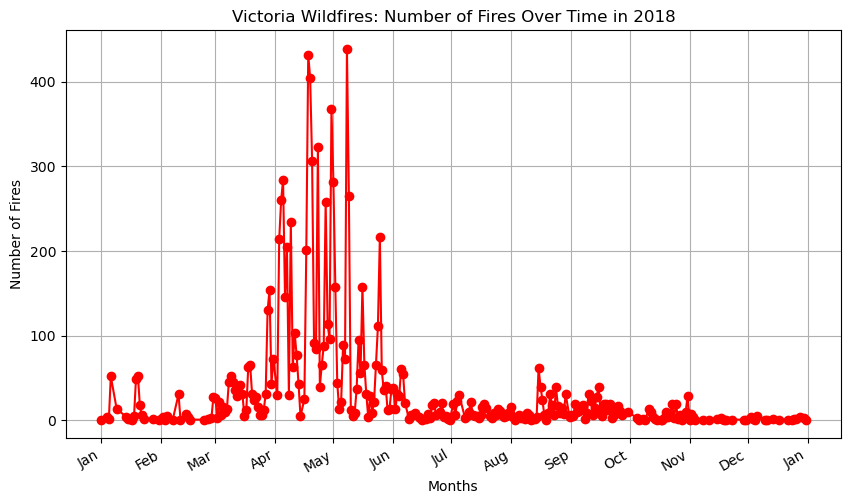

In [10]:
# Create a new figure and axis for 2018
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the data for 2018
fires_by_date_2018.plot(ax=ax1, kind='line', marker='o', color='red', label='2018')
ax1.set_title('Victoria Wildfires: Number of Fires Over Time in 2018')
ax1.set_xlabel('Months')
ax1.set_ylabel('Number of Fires')
ax1.grid(True)
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()


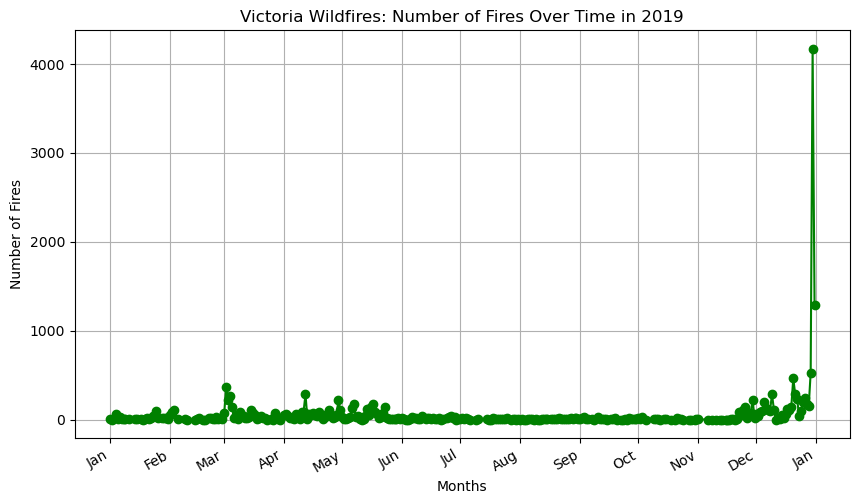

In [11]:
# Create a new figure and axis for 2019
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the data for 2019
fires_by_date_2019.plot(ax=ax1, kind='line', marker='o', color='green', label='2019')
ax1.set_title('Victoria Wildfires: Number of Fires Over Time in 2019')
ax1.set_xlabel('Months')
ax1.set_ylabel('Number of Fires')
ax1.grid(True)
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()


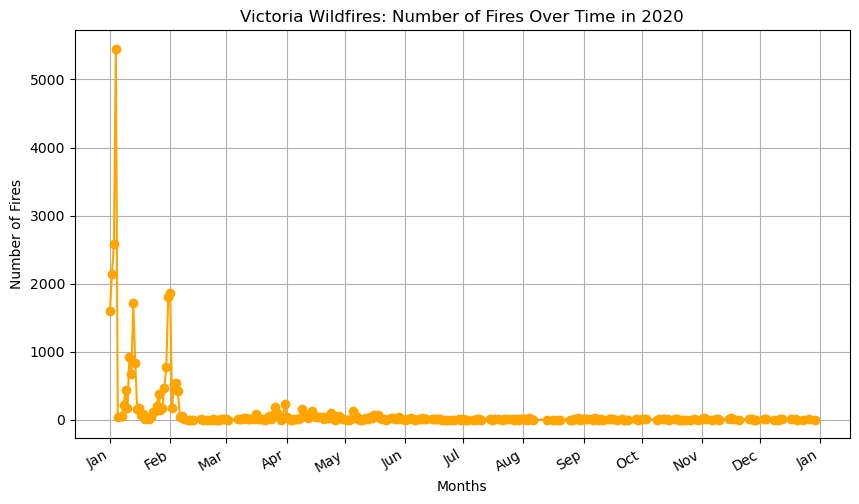

In [12]:
# Create a new figure and axis for 2020
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the data for 2020
fires_by_date_2020.plot(ax=ax1, kind='line', marker='o', color='orange', label='2020')
ax1.set_title('Victoria Wildfires: Number of Fires Over Time in 2020')
ax1.set_xlabel('Months')
ax1.set_ylabel('Number of Fires')
ax1.grid(True)
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()


# MODIS Victoria Wildfires Data Processing for Machine Learning

In [13]:
# Merge all the data
df_victoria_merged = pd.concat([df_victoria_2017,df_victoria_2018,df_victoria_2019,df_victoria_2020], 
                               ignore_index=True)

In [15]:
# Drop unncessary column to train data
df_victoria_train_data = df_victoria_merged.drop(['scan','track','acq_time','satellite',
                                                  'instrument','version','bright_t31'], axis=1)

df_victoria_train_data.head()

,latitude,longitude,brightness,acq_date,confidence,frp,daynight,type
0,-35.8234,146.5838,301.8,2017-01-01,44,7.4,N,0
1,-37.8179,145.3028,315.0,2017-01-03,44,9.8,D,0
2,-37.6923,140.5473,313.0,2017-01-03,40,7.7,D,0
3,-37.5509,140.8295,313.3,2017-01-03,45,8.6,D,0
4,-34.2765,145.8450,337.8,2017-01-03,82,126.6,D,0


In [30]:
# Replace D = 1 and N = 0
df_victoria_train_data=df_victoria_train_data.replace({'N':0,'D':1})

df_victoria_train_data.head()

,latitude,longitude,brightness,date,confidence,frp,daynight,type,zone
0,-35.8234,146.5838,301.8,2017-01-01,44,7.4,0,0,15.0
1,-37.8179,145.3028,315.0,2017-01-03,44,9.8,1,0,13.0
2,-37.6923,140.5473,313.0,2017-01-03,40,7.7,1,0,4.0
3,-37.5509,140.8295,313.3,2017-01-03,45,8.6,1,0,4.0
4,-34.2765,145.8450,337.8,2017-01-03,82,126.6,1,0,NaN


Zone 1 = Lat -34 between -35 and Long 140 between 142
Zone 2 = Lat -35 between  -36 and Long 140  between  142
Zone 3 = Lat -36 between -37 and Long 140  between  142
Zone 4 = Lat -37 between  -38 and Long 140  between  142
Zone 5 = Lat -38 between -39 and Long 140  between  142

Zone 6 = Lat -34  between  -35 and Long 142  between  144
Zone 7 = Lat -35 between  -36 and Long 142  between  144
Zone 8 = Lat -36 between  -37 and Long 142  between  144
Zone 9 = Lat -37 between  -38 and Long 142  between  144
Zone 10 = Lat -38 between  -39 and Long 142 between  144

Zone 11 = Lat -35 between  -36 and Long 144  between  146
Zone 12 = Lat -36 between  -37 and Long 144  between  146
Zone 13 = Lat -37 between  -38 and Long 144  between  146
Zone 14 = Lat -38 between  -39 and Long 144  between  146

Zone 15 = Lat -35 between  -36 and Long 146  between  148
Zone 16 = Lat -36 between  -37 and Long 146  between  148
Zone 17 = Lat -37 between  -38 and Long 146  between  148
Zone 18 = Lat -38 between  - 39 and Long 146 between  148

Zone 19 = Lat -36 between  -37 and Long 148  between  150
Zone 20 = Lat -37 between  -38 and Long 148  between  150

In [17]:
def assign_zone(row):
    lat = row['latitude']
    long = row['longitude']
    # Define the zones
    zones = {
        1: {'lat_range': (-35, -34), 'long_range': (140, 142)},
        2: {'lat_range': (-36, -35), 'long_range': (140, 142)},
        3: {'lat_range': (-37, -36), 'long_range': (140, 142)},
        4: {'lat_range': (-38, -37), 'long_range': (140, 142)},
        5: {'lat_range': (-39, -38), 'long_range': (140, 142)},
        
        6: {'lat_range': (-35, -34), 'long_range': (142, 144)},
        7: {'lat_range': (-36, -35), 'long_range': (142, 144)},
        8: {'lat_range': (-37, -36), 'long_range': (142, 144)},
        9: {'lat_range': (-38, -37), 'long_range': (142, 144)},
        10: {'lat_range': (-39, -38), 'long_range': (142, 144)},
        
        11: {'lat_range': (-36, -35), 'long_range': (144, 146)},
        12: {'lat_range': (-37, -36), 'long_range': (144, 146)},
        13: {'lat_range': (-38, -37), 'long_range': (144, 146)},
        14: {'lat_range': (-39, -38), 'long_range': (144, 146)},
        
        15: {'lat_range': (-36, -35), 'long_range': (146, 148)},
        16: {'lat_range': (-37, -36), 'long_range': (146, 148)},
        17: {'lat_range': (-38, -37), 'long_range': (146, 148)},
        18: {'lat_range': (-39, -38), 'long_range': (146, 148)},
        
        19: {'lat_range': (-37, -36), 'long_range': (148, 150)},
        20: {'lat_range': (-38, -37), 'long_range': (148, 150)}
    }

    # Iterate through zones and check if the latitude and longitude fall within any range
    for zone_num, zone_info in zones.items():
        if lat >= zone_info['lat_range'][0] and lat < zone_info['lat_range'][1] \
            and long >= zone_info['long_range'][0] and long < zone_info['long_range'][1]:
            return zone_num
    return None  # If no zone matches


In [31]:
df_victoria_train_data['zone'] = df_victoria_train_data.apply(assign_zone, axis=1)

df_victoria_train_data = df_victoria_train_data.rename(columns={'acq_date': 'date'})

df_victoria_train_data.head() 

,latitude,longitude,brightness,date,confidence,frp,daynight,type,zone
0,-35.8234,146.5838,301.8,2017-01-01,44,7.4,0,0,15.0
1,-37.8179,145.3028,315.0,2017-01-03,44,9.8,1,0,13.0
2,-37.6923,140.5473,313.0,2017-01-03,40,7.7,1,0,4.0
3,-37.5509,140.8295,313.3,2017-01-03,45,8.6,1,0,4.0
4,-34.2765,145.8450,337.8,2017-01-03,82,126.6,1,0,NaN


In [19]:
df_victoria_train_data['zone'].unique()

array([15., 13.,  4., nan, 14.,  8.,  6.,  3.,  9., 20., 10., 12.,  2.,
       19., 18., 11.,  1., 17.,  7., 16.,  5.])

In [20]:
df_victoria_train_data['zone'].isnull().sum()

17182

In [32]:
#Check which lat and long have None data

df_null_zone=df_victoria_train_data[df_victoria_train_data['zone'].isnull()]
df_null_zone.head()

,latitude,longitude,brightness,date,confidence,frp,daynight,type,zone
4,-34.2765,145.8450,337.8,2017-01-03,82,126.6,1,0,NaN
5,-34.2741,145.8485,327.5,2017-01-03,58,58.8,1,0,NaN
6,-34.2692,145.8770,329.1,2017-01-03,62,66.5,1,0,NaN
7,-34.3684,145.9155,370.6,2017-01-03,100,519.6,1,0,NaN
8,-34.3749,145.8911,383.6,2017-01-03,100,760.9,1,0,NaN


In [22]:
df_victoria_train_data.to_csv('df_victoria_train_data',index=False)

In [23]:
train_data_victoria_bushfire=df_victoria_train_data.dropna(subset=['zone'])

In [24]:
# train data is created

train_data_victoria_bushfire.to_csv('train_data_victoria_bushfire', index=False)